In [12]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

#the analysis should include one cleaning task (or more)
df['Mean Score'] = pd.to_numeric(df['Mean Score'], errors='coerce') # Convert text to numeric and parse errors
df = df.dropna(subset=['Mean Score']) # dropna drops NaN values


average_scores_by_school = df.groupby('School Name')['Mean Score'].mean()
print(average_scores_by_school)
average_scores_by_school_subject = df.groupby(['School Name', 'Regents Exam'])['Mean Score'].mean()
highest_average_by_subject = average_scores_by_school_subject.groupby('Regents Exam').max()
overall_highest_average = df.groupby('School Name')['Mean Score'].mean().idxmax()

print("Average scores by school and subject:\n", average_scores_by_school_subject)
print("\nSchool with the highest average score in each subject:\n", highest_average_by_subject)
print("\nSchool with the overall highest average score:", overall_highest_average)

School Name
47 The American Sign Language and English Secondar    60.699034
A. Philip Randolph Campus High School                 65.531063
ACORN Community High School                           60.067005
Abraham Lincoln High School                           61.620147
Abraham Lincoln Yabc                                  57.846795
                                                        ...    
Young Women's Leadership School                       72.126829
Young Women's Leadership School of Brooklyn           65.778462
Young Women's Leadership School of the Bronx          69.984524
Young Women's Leadership School, Astoria              71.639474
Young Women's Leadership School, Queens               67.860082
Name: Mean Score, Length: 965, dtype: float64
Average scores by school and subject:
 School Name                                         Regents Exam                   
47 The American Sign Language and English Secondar  Algebra2/Trigonometry              42.800000
                  

In [13]:
#pick any school in this dataset as an initial comparison point

#school with a relatively high average score for initial comparison
initial_comparison_school = average_scores_by_school.idxmax()

print(f"The school with the highest average score is: {initial_comparison_school}")


The school with the highest average score is: Stuyvesant High School


In [19]:
# compare above school to schools in the entire dataset, schools in a
# particular borough, or schools in a particular district


def compare_school(school_name, criteria='all'):
  """
  Compares a school's average score to other schools based on a criteria.

  Args:
    school_name: The name of the school to compare.
    criteria: The criteria for comparison (all, borough, district). Defaults to 'all'.
  """
  school_avg_score = average_scores_by_school.loc[school_name]

  if criteria == 'all':
    comparison_data = average_scores_by_school
    print(f"Comparing {school_name} to all schools:")
  elif criteria == 'School Level':
    #additional comparison point
    school_level = df.loc[df['School Name'] == school_name, 'School Level'].iloc[0]
    comparison_data = df[df['School Level'] == school_level].groupby('School Name')['Mean Score'].mean()
    print(f"Comparing {school_name} to other schools in {school_level}:")
  else:
    print("Invalid criteria. Please choose 'all', 'borough', or 'district'.")
    return

  print(f"{school_name}'s average score: {school_avg_score}")
  print("Comparison:")
  print(comparison_data)


#compare_school(initial_comparison_school, criteria='all')
compare_school(initial_comparison_school, criteria='School Level')



Comparing Stuyvesant High School to other schools in High school:
Stuyvesant High School's average score: 91.69778597785977
Comparison:
School Name
47 The American Sign Language and English Secondar    60.699034
A. Philip Randolph Campus High School                 65.531063
ACORN Community High School                           60.067005
Abraham Lincoln High School                           61.620147
Abraham Lincoln Yabc                                  57.846795
                                                        ...    
Williamsburg Preparatory School                       68.773443
Wings Academy                                         58.007860
Women's Academy of Excellence                         62.103431
World Academy for Total Community Health High Scho    60.501515
World View High School                                62.519283
Name: Mean Score, Length: 457, dtype: float64


In [14]:
#pick a feature/measure/score

average_scores_by_school = df.groupby('School Name')['Mean Score'].mean()
print(average_scores_by_school)

#the analysis should include some descriptive statistics
print("\nDescriptive Statistics for Mean Score:")
print(df['Mean Score'].describe())


School Name
47 The American Sign Language and English Secondar    60.699034
A. Philip Randolph Campus High School                 65.531063
ACORN Community High School                           60.067005
Abraham Lincoln High School                           61.620147
Abraham Lincoln Yabc                                  57.846795
                                                        ...    
Young Women's Leadership School                       72.126829
Young Women's Leadership School of Brooklyn           65.778462
Young Women's Leadership School of the Bronx          69.984524
Young Women's Leadership School, Astoria              71.639474
Young Women's Leadership School, Queens               67.860082
Name: Mean Score, Length: 965, dtype: float64


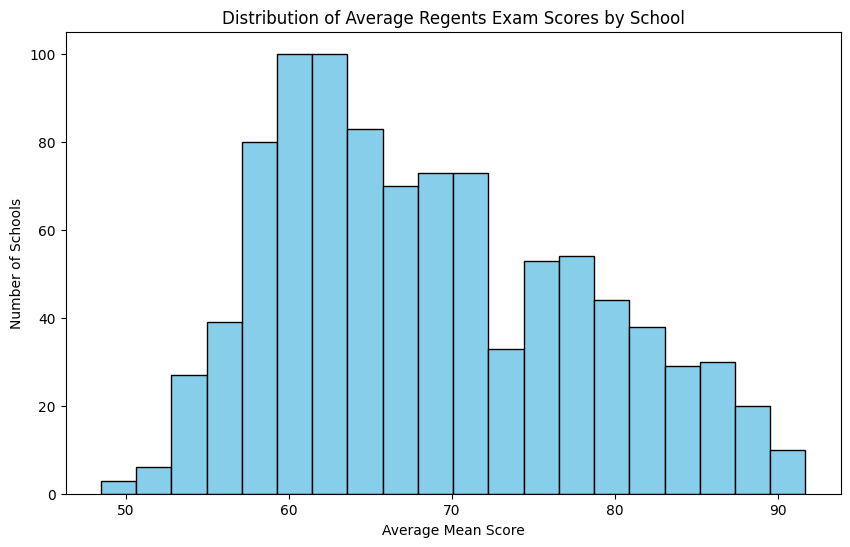

In [22]:
#the analysis should include one visualization
import matplotlib.pyplot as plt

# Visualization: Histogram of average scores
plt.figure(figsize=(10, 6))
plt.hist(average_scores_by_school, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Regents Exam Scores by School')
plt.xlabel('Average Mean Score')
plt.ylabel('Number of Schools')
plt.show()

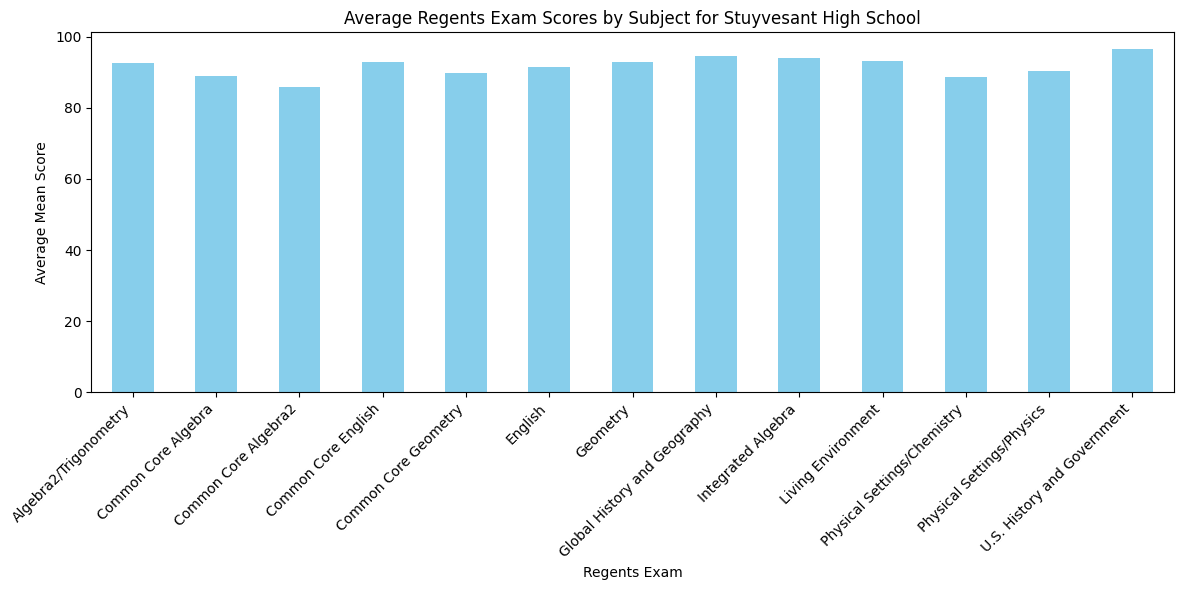

In [24]:
#the analysis should include one visualization
average_scores_by_subject_for_school = df[df['School Name'] == initial_comparison_school].groupby('Regents Exam')['Mean Score'].mean()

plt.figure(figsize=(12, 6))
average_scores_by_subject_for_school.plot(kind='bar', color='skyblue')
plt.title(f'Average Regents Exam Scores by Subject for {initial_comparison_school}')
plt.xlabel('Regents Exam')
plt.ylabel('Average Mean Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
#the analysis should include a brief conclusion statement

print("\nConclusion:")
print("The analysis revealed that", initial_comparison_school, "has the highest average Regents exam score among all schools.")
print("By comparing it to other schools at the same level, we can see how it performs relative to its peers. ")
print("The visualization of the average score distribution provides an overview of the performance of schools across NYC. ")
print("The analysis also highlights the average scores in different subjects for", initial_comparison_school, ", providing a deeper understanding of its strengths and weaknesses.")
print("Further investigation could include exploring the impact of factors like school demographics or funding on the average scores.")




Conclusion:
The analysis revealed that Stuyvesant High School has the highest average Regents exam score among all schools.
By comparing it to other schools at the same level, we can see how it performs relative to its peers. 
The visualization of the average score distribution provides an overview of the performance of schools across NYC. 
The analysis also highlights the average scores in different subjects for Stuyvesant High School , providing a deeper understanding of its strengths and weaknesses.
Further investigation could include exploring the impact of factors like school demographics or funding on the average scores.
